Lets begin by installing requiered libraries


In [ ]:
! pip install numpy pandas matplotlib seaborn --quiet

In [ ]:
! pip install opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


# Downloading the data

In [ ]:
import os
import opendatasets as od
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [ ]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [ ]:
os.listdir('rossmann-store-sales')

['train.csv', 'sample_submission.csv', 'store.csv', 'test.csv']

Lets load the data into pandas

In [ ]:
ross_df = pd.read_csv('rossmann-store-sales/train.csv', low_memory=False)
store_df = pd.read_csv('rossmann-store-sales/store.csv', low_memory=False)
test_df = pd.read_csv('rossmann-store-sales/test.csv', low_memory=False)
submission_df = pd.read_csv('rossmann-store-sales/sample_submission.csv', low_memory=False)

In [ ]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


lets merge the information from store  _df into train_df and test_df

In [ ]:
merged_df = ross_df.merge(store_df, on='Store', how='left')
merged_test_df = test_df.merge(store_df, on='Store', how='left')

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# Preprocessing and Feature Engineering

Lets take a look at the available columns,and figure out if we create new columns or apply any useful transformations.

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

# Date
First,let's Date to a column and extruct different parts of the date.

In [ ]:
def split_date(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df.Date.dt.year
  df['Month'] = df.Date.dt.month
  df['Day'] = df.Date.dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week
  return df

In [ ]:
split_date(merged_df)
split_date(merged_test_df)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17,38
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17,38
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17,38
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1,31
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,8,1,31
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1,31
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1,31


# Store Open/Closed

Next,notice that the sales are zero whenever the store is closed

In [ ]:
merged_df[merged_df.Open == 0 ].Sales.value_counts()

,count
Sales,
0,172817


Instead of trying to model this relationship,it would be better to hard-code it in our predictions,and remove the rows where the store is closed.We wont remove any rows from the test set,since we need to make predictions for every row.

In [ ]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [ ]:
merged_df[merged_df.Open == 0 ].Sales.value_counts()

,count
Sales,


In [ ]:
merged_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
921752,433,3,2013-03-27,7888,791,1,1,0,1,a,c,30030.0,11.0,2010.0,0,NaN,NaN,NaN,2013,3,27,13
372474,621,5,2014-08-08,5489,769,1,1,0,1,a,a,30.0,7.0,2002.0,0,NaN,NaN,NaN,2014,8,8,32
274708,1108,5,2014-11-21,5516,599,1,0,0,0,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN,2014,11,21,47
890291,192,3,2013-04-24,5811,435,1,1,0,0,d,c,2770.0,3.0,2008.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2013,4,24,17
970708,329,1,2013-02-11,2224,256,1,0,0,0,a,a,1310.0,6.0,1990.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,2,11,7
343132,203,1,2014-09-08,5721,812,1,0,0,0,c,c,490.0,11.0,2002.0,0,NaN,NaN,NaN,2014,9,8,37
359858,69,4,2014-08-21,9320,1125,1,1,0,1,c,c,1130.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",2014,8,21,34
776136,882,1,2013-08-05,5978,775,1,0,0,1,a,a,30.0,4.0,2013.0,0,NaN,NaN,NaN,2013,8,5,32
827786,127,3,2013-06-19,5089,675,1,1,0,0,d,a,1350.0,12.0,2005.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2013,6,19,25
817810,186,5,2013-06-28,3481,378,1,0,0,0,a,a,290.0,10.0,2011.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",2013,6,28,26


# Competition
Next,We can use the columns CompetitionOpenSince[Month/Year] columns from store_df to compute the number of months for which a competitor has been open near the store

In [ ]:
def comp_months(df):
  df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)



In [ ]:
comp_months(merged_df)
comp_months(merged_test_df)

In [ ]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']]

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
0,2015-07-31,1270.0,2008.0,9.0,82.0
1,2015-07-31,570.0,2007.0,11.0,92.0
2,2015-07-31,14130.0,2006.0,12.0,103.0
3,2015-07-31,620.0,2009.0,9.0,70.0
4,2015-07-31,29910.0,2015.0,4.0,3.0
...,...,...,...,...,...
1016776,2013-01-01,150.0,2006.0,9.0,76.0
1016827,2013-01-01,860.0,1999.0,10.0,159.0
1016863,2013-01-01,840.0,NaN,NaN,0.0
1017042,2013-01-01,1430.0,NaN,NaN,0.0


In [1]:
merged_df.CompetitionOpen

NameError: name 'merged_df' is not defined

# Additional Promotion

we can also add some additional columns to indicate how long a store has been running Promo2 and whether a new round of Promo2 starts in the current month.

In [2]:

def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}

    try:
      months = (row['PromoInterval'] or '').split(',')
      if row['Promo2Open'] and month2str[row['Month']] in months:
        return 1

      else :
        return 0
    except Exception:
      return 0

def promo_cols(df):
  # months since Promo2 was open
  df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek)*(7/30.5)
  df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0)*df['Promo2']
  # whether a new round of promotion was started in the current month
  df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']








In [ ]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [ ]:
merged_df[['Date', 'Promo2', 'Promo2Open', 'IsPromo2Month', 'PromoInterval', 'Promo2SinceWeek',
            'Promo2SinceYear']]

,Date,Promo2,Promo2Open,IsPromo2Month,PromoInterval,Promo2SinceWeek,Promo2SinceYear
0,2015-07-31,0,0.000000,0,NaN,NaN,NaN
1,2015-07-31,1,64.131148,1,"Jan,Apr,Jul,Oct",13.0,2010.0
2,2015-07-31,1,51.901639,1,"Jan,Apr,Jul,Oct",14.0,2011.0
3,2015-07-31,0,0.000000,0,NaN,NaN,NaN
4,2015-07-31,0,0.000000,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1016776,2013-01-01,0,0.000000,0,NaN,NaN,NaN
1016827,2013-01-01,0,0.000000,0,NaN,NaN,NaN
1016863,2013-01-01,1,1.213115,1,"Jan,Apr,Jul,Oct",48.0,2012.0
1017042,2013-01-01,0,0.000000,0,NaN,NaN,NaN


In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0,0.000000,0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0,0.000000,0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,1.213115,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0,0.000000,0


In [3]:
merged_df

NameError: name 'merged_df' is not defined

# Input and Target Columns

Let's select the columns that we will use for training


In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [ ]:
input_cols = ['Store','DayOfWeek','Promo','StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
              'CompetitionDistance', 'Promo2','Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month']
target_col = ['Sales']

In [ ]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [ ]:
test_inputs = merged_test_df[input_cols].copy()

In [4]:
inputs

NameError: name 'inputs' is not defined

In [ ]:
test_inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,4,1,0,0,c,a,1270.0,0,2015,9,17,38,84.0,0.000000,0
1,3,4,1,0,0,a,a,14130.0,1,2015,9,17,38,105.0,53.508197,0
2,7,4,1,0,0,a,c,24000.0,0,2015,9,17,38,29.0,0.000000,0
3,8,4,1,0,0,a,a,7520.0,0,2015,9,17,38,11.0,0.000000,0
4,9,4,1,0,0,a,c,2030.0,0,2015,9,17,38,181.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,0,0,0,a,a,1900.0,1,2015,8,1,31,14.0,24.000000,0
41084,1112,6,0,0,0,c,c,1880.0,0,2015,8,1,31,112.0,0.000000,0
41085,1113,6,0,0,0,a,c,9260.0,0,2015,8,1,31,0.0,0.000000,0
41086,1114,6,0,0,0,a,c,870.0,0,2015,8,1,31,0.0,0.000000,0


Let's identify numeric and categorical columns.Note that we can treat binary categorical columns as numeric columns

In [ ]:
inputs.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2', 'Year',
       'Month', 'Day', 'WeekOfYear', 'CompetitionOpen', 'Promo2Open',
       'IsPromo2Month'],
      dtype='object')

In [5]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday','CompetitionDistance', 'Promo2',
     'CompetitionOpen','Year', 'Month', 'Day', 'WeekOfYear', ]
categorical_cols = ['DayOfWeek', 'StateHoliday','SchoolHoliday','StoreType','Assortment']

# Impute missing numerical data

In [ ]:
inputs[numeric_cols].isna().sum()

,0
Store,0
Promo,0
SchoolHoliday,0
CompetitionDistance,2186
Promo2,0
CompetitionOpen,0
Year,0
Month,0
Day,0
WeekOfYear,0


In [6]:
test_inputs[numeric_cols].isna().sum()

NameError: name 'test_inputs' is not defined

Seems like competition distance is the only missing value,and we can simply fill it with the highest value (to indicate that competition is very far away)

In [ ]:
max_distance = inputs.CompetitionDistance.max()

In [ ]:
inputs['CompetitionDistance'] = inputs.CompetitionDistance.fillna(max_distance)
test_inputs['CompetitionDistance'] = test_inputs.CompetitionDistance.fillna(max_distance)

# Scale Numeric Values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# Encode Categorical Columns

Let's one-hot encode categorical columns.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [7]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

NameError: name 'encoder' is not defined

Finally,let's extract out all the numeric data for training

In [ ]:
x = inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
x

,Store,Promo,SchoolHoliday,CompetitionDistance,Promo2,CompetitionOpen,Year,Month,Day,WeekOfYear,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_0.0,SchoolHoliday_1.0,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,1.0,1.0,0.016482,0.0,0.059163,1.0,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000898,1.0,1.0,0.007252,1.0,0.066378,1.0,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,1.0,1.0,0.186050,1.0,0.074315,1.0,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,1.0,1.0,0.007911,0.0,0.050505,1.0,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,1.0,1.0,0.394119,0.0,0.002165,1.0,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.611311,0.0,1.0,0.001714,0.0,0.054834,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016827,0.657092,0.0,1.0,0.011076,0.0,0.114719,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016863,0.689408,0.0,1.0,0.010812,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1017042,0.850090,0.0,1.0,0.018592,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x_test

,Store,Promo,SchoolHoliday,CompetitionDistance,Promo2,CompetitionOpen,Year,Month,Day,WeekOfYear,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_0.0,SchoolHoliday_1.0,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,1.0,0.0,0.016482,0.0,0.060606,1.0,0.727273,0.533333,0.725490,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.001795,1.0,0.0,0.186050,1.0,0.075758,1.0,0.727273,0.533333,0.725490,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.005386,1.0,0.0,0.316192,0.0,0.020924,1.0,0.727273,0.533333,0.725490,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.006284,1.0,0.0,0.098892,0.0,0.007937,1.0,0.727273,0.533333,0.725490,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.007181,1.0,0.0,0.026503,0.0,0.130592,1.0,0.727273,0.533333,0.725490,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,0.996409,0.0,0.0,0.024789,1.0,0.010101,1.0,0.636364,0.000000,0.588235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
41084,0.997307,0.0,0.0,0.024525,0.0,0.080808,1.0,0.636364,0.000000,0.588235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41085,0.998205,0.0,0.0,0.121835,0.0,0.000000,1.0,0.636364,0.000000,0.588235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
41086,0.999102,0.0,0.0,0.011208,0.0,0.000000,1.0,0.636364,0.000000,0.588235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Gradient Boosting

We are now ready to train our gradient boosting machine (GBM) model.Here's how GBM model works :



1.   The average value of target column  uses as an initial prediction  for every input.

2.   The residuals (difference) of the predictions with the target are computed.
3.   A decision tree of limited depth is trained to predict just the residuals for each input.
4.   Predictions from the decision tree are  scaled using a parameter called the learning rate (this prevent from overfitting)
5.  Scaled predictions from the tree are added to the previous predictions to obtain the new and improved predictions.
6.  step 2 to 5 are repeated to create new decision trees,each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similiar to the gradient descent).The term "boosting" refers the general technique of training new model to improve the result of an existing model.



# Training
To train a GBM we can use the XGBRegressor class from the XGBoost library

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(n_estimators=20, random_state =42, n_jobs=-1, max_depth=4)

In [ ]:
model.fit(x,targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=20,
             n_jobs=-1, num_parallel_tree=None, ...)

In [8]:
preds = model.predict(x)
preds

NameError: name 'model' is not defined

# Evaluation
let's evaluate the predictions using RMSE error.

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [10]:
def rmse (a, b):
  # Calculating MSE and then taking the square root to get RMSE
  mse = mean_squared_error(a, b)

  return mse**.5 # taking the square root to get RMSE

In [ ]:
rmse(preds, targets)

2414.0529198839035

In [ ]:
merged_df.Sales.min(), merged_df.Sales.max()

(0, 41551)

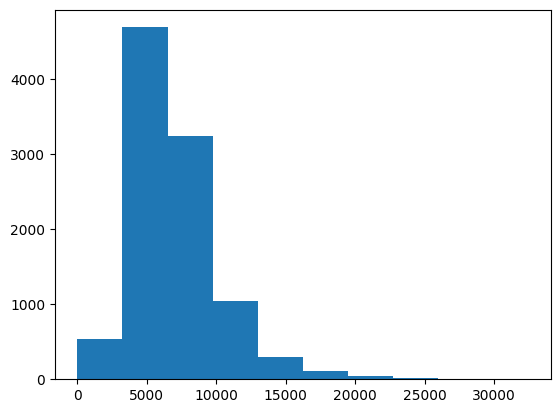

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(merged_df.Sales.sample(10000));

# Visualization

We can visualize individual trees using plot_tree (note:this require the graphviz library to be installed)

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 30, 30

In [11]:
plot_tree(model,rankdir='LR', num_trees=0);

NameError: name 'plot_tree' is not defined

/usr/local/lib/python3.11/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


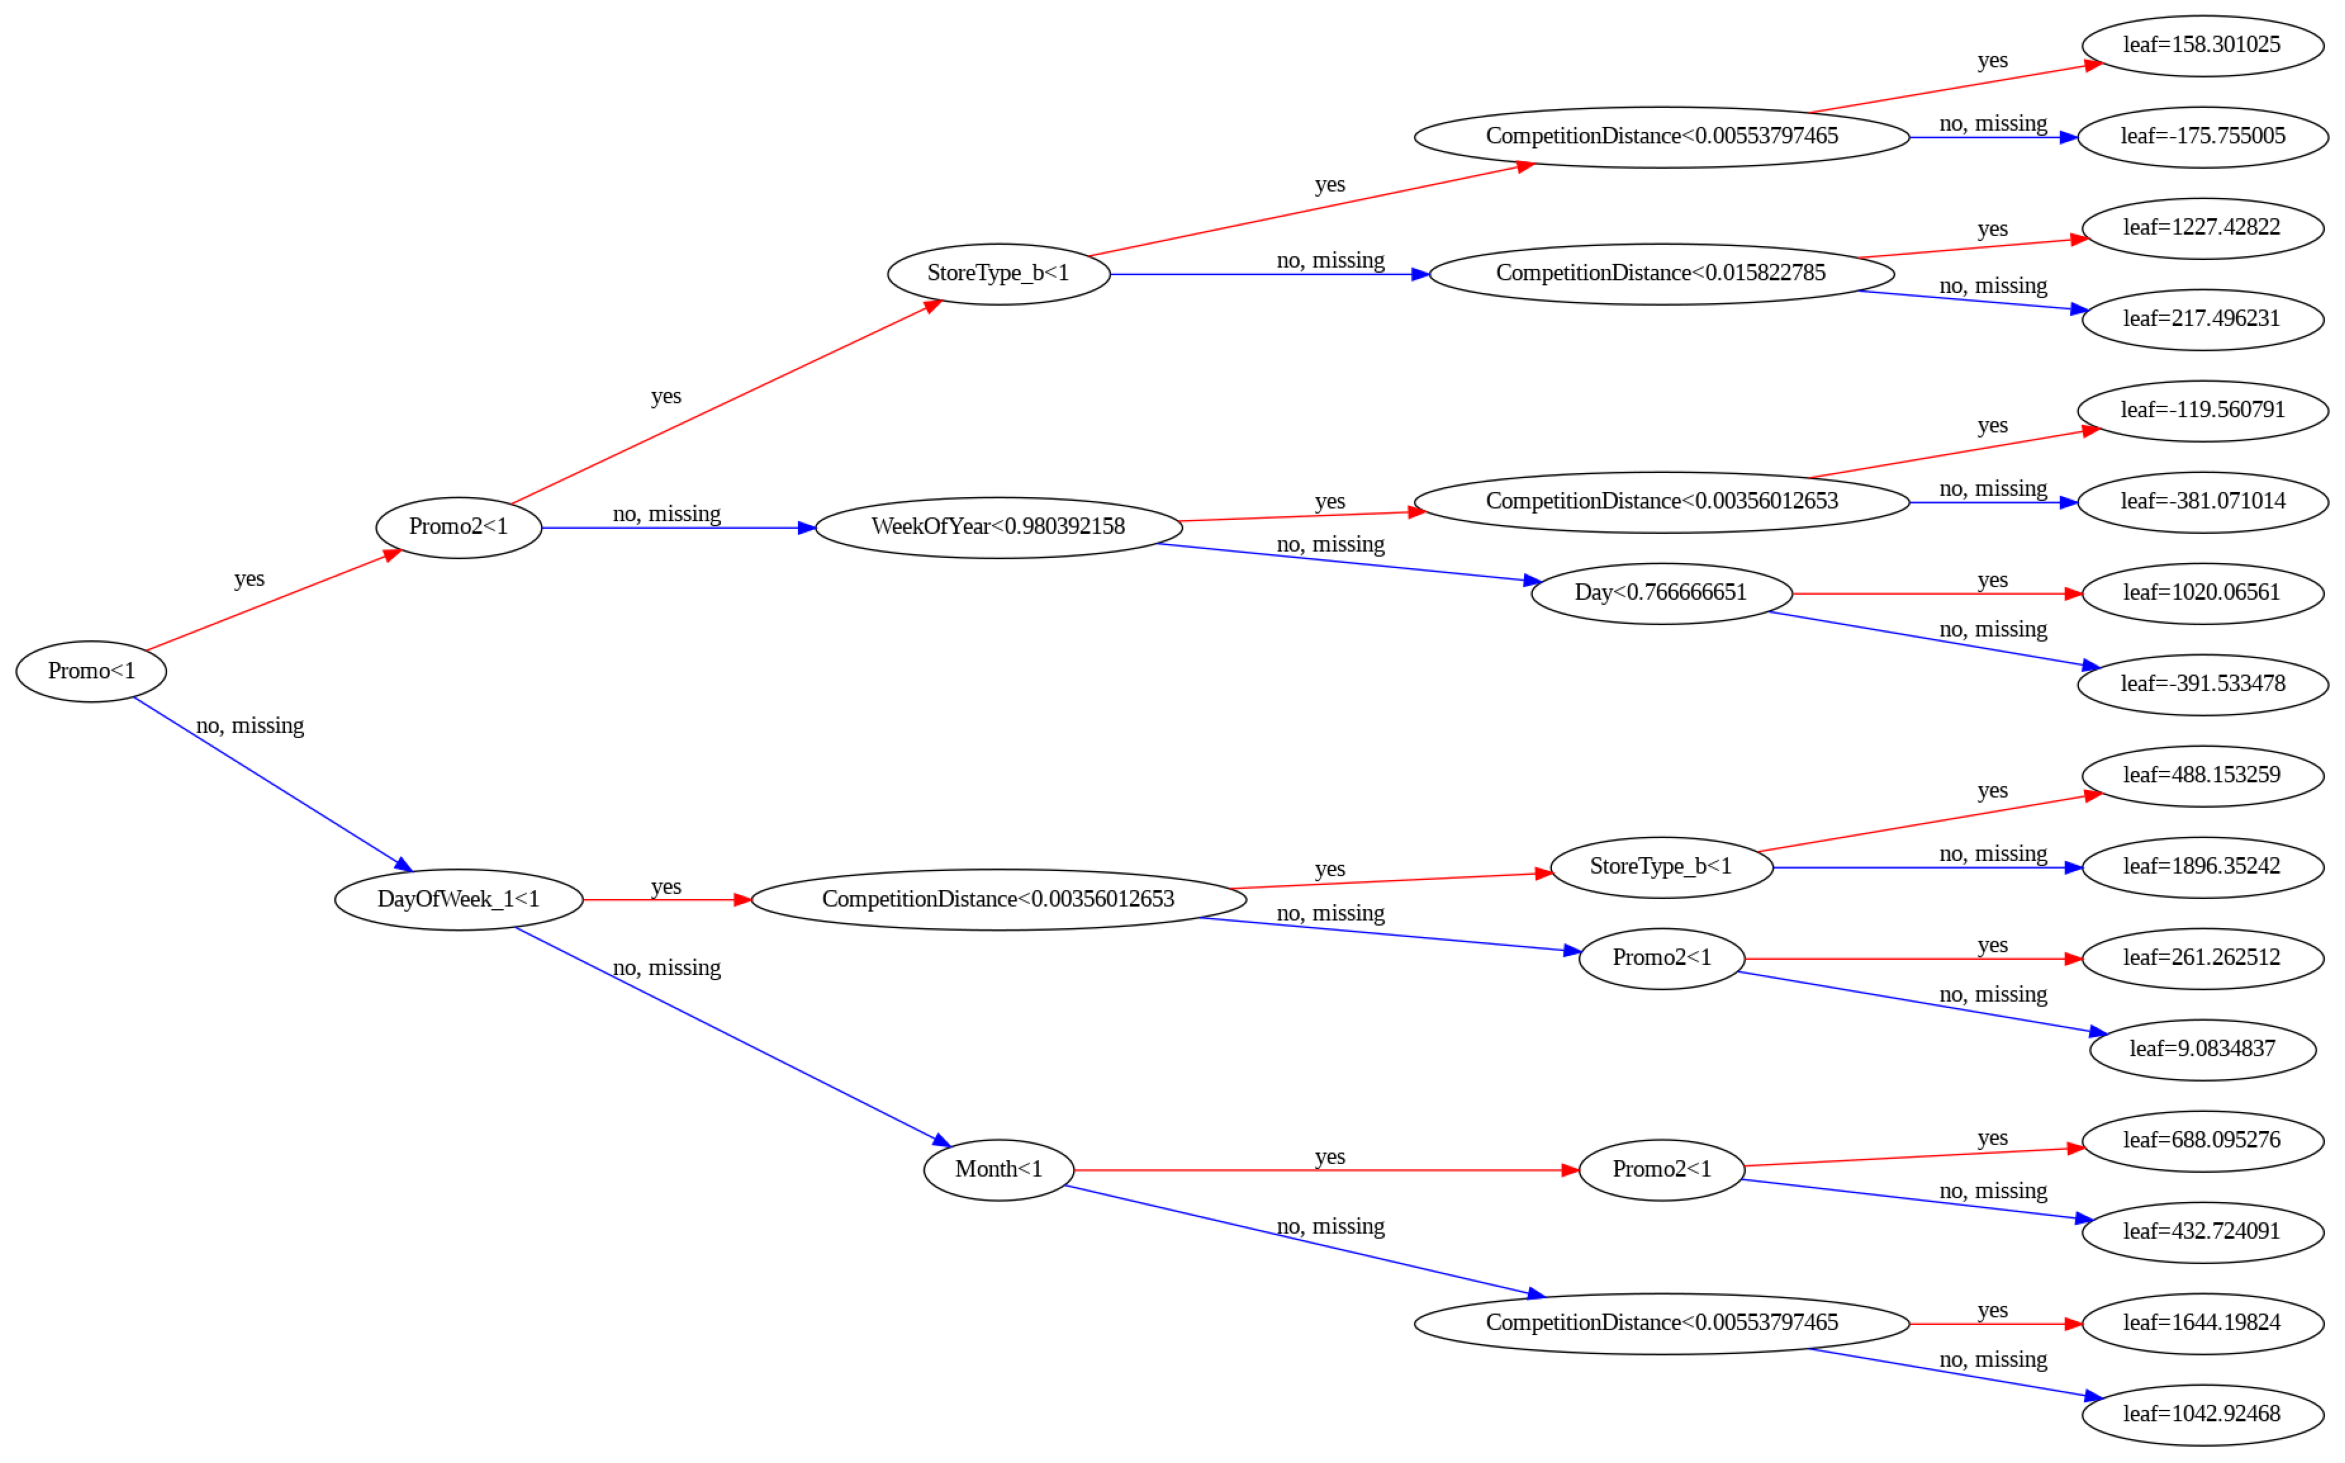

In [ ]:
plot_tree(model,rankdir='LR', num_trees=1);

/usr/local/lib/python3.11/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


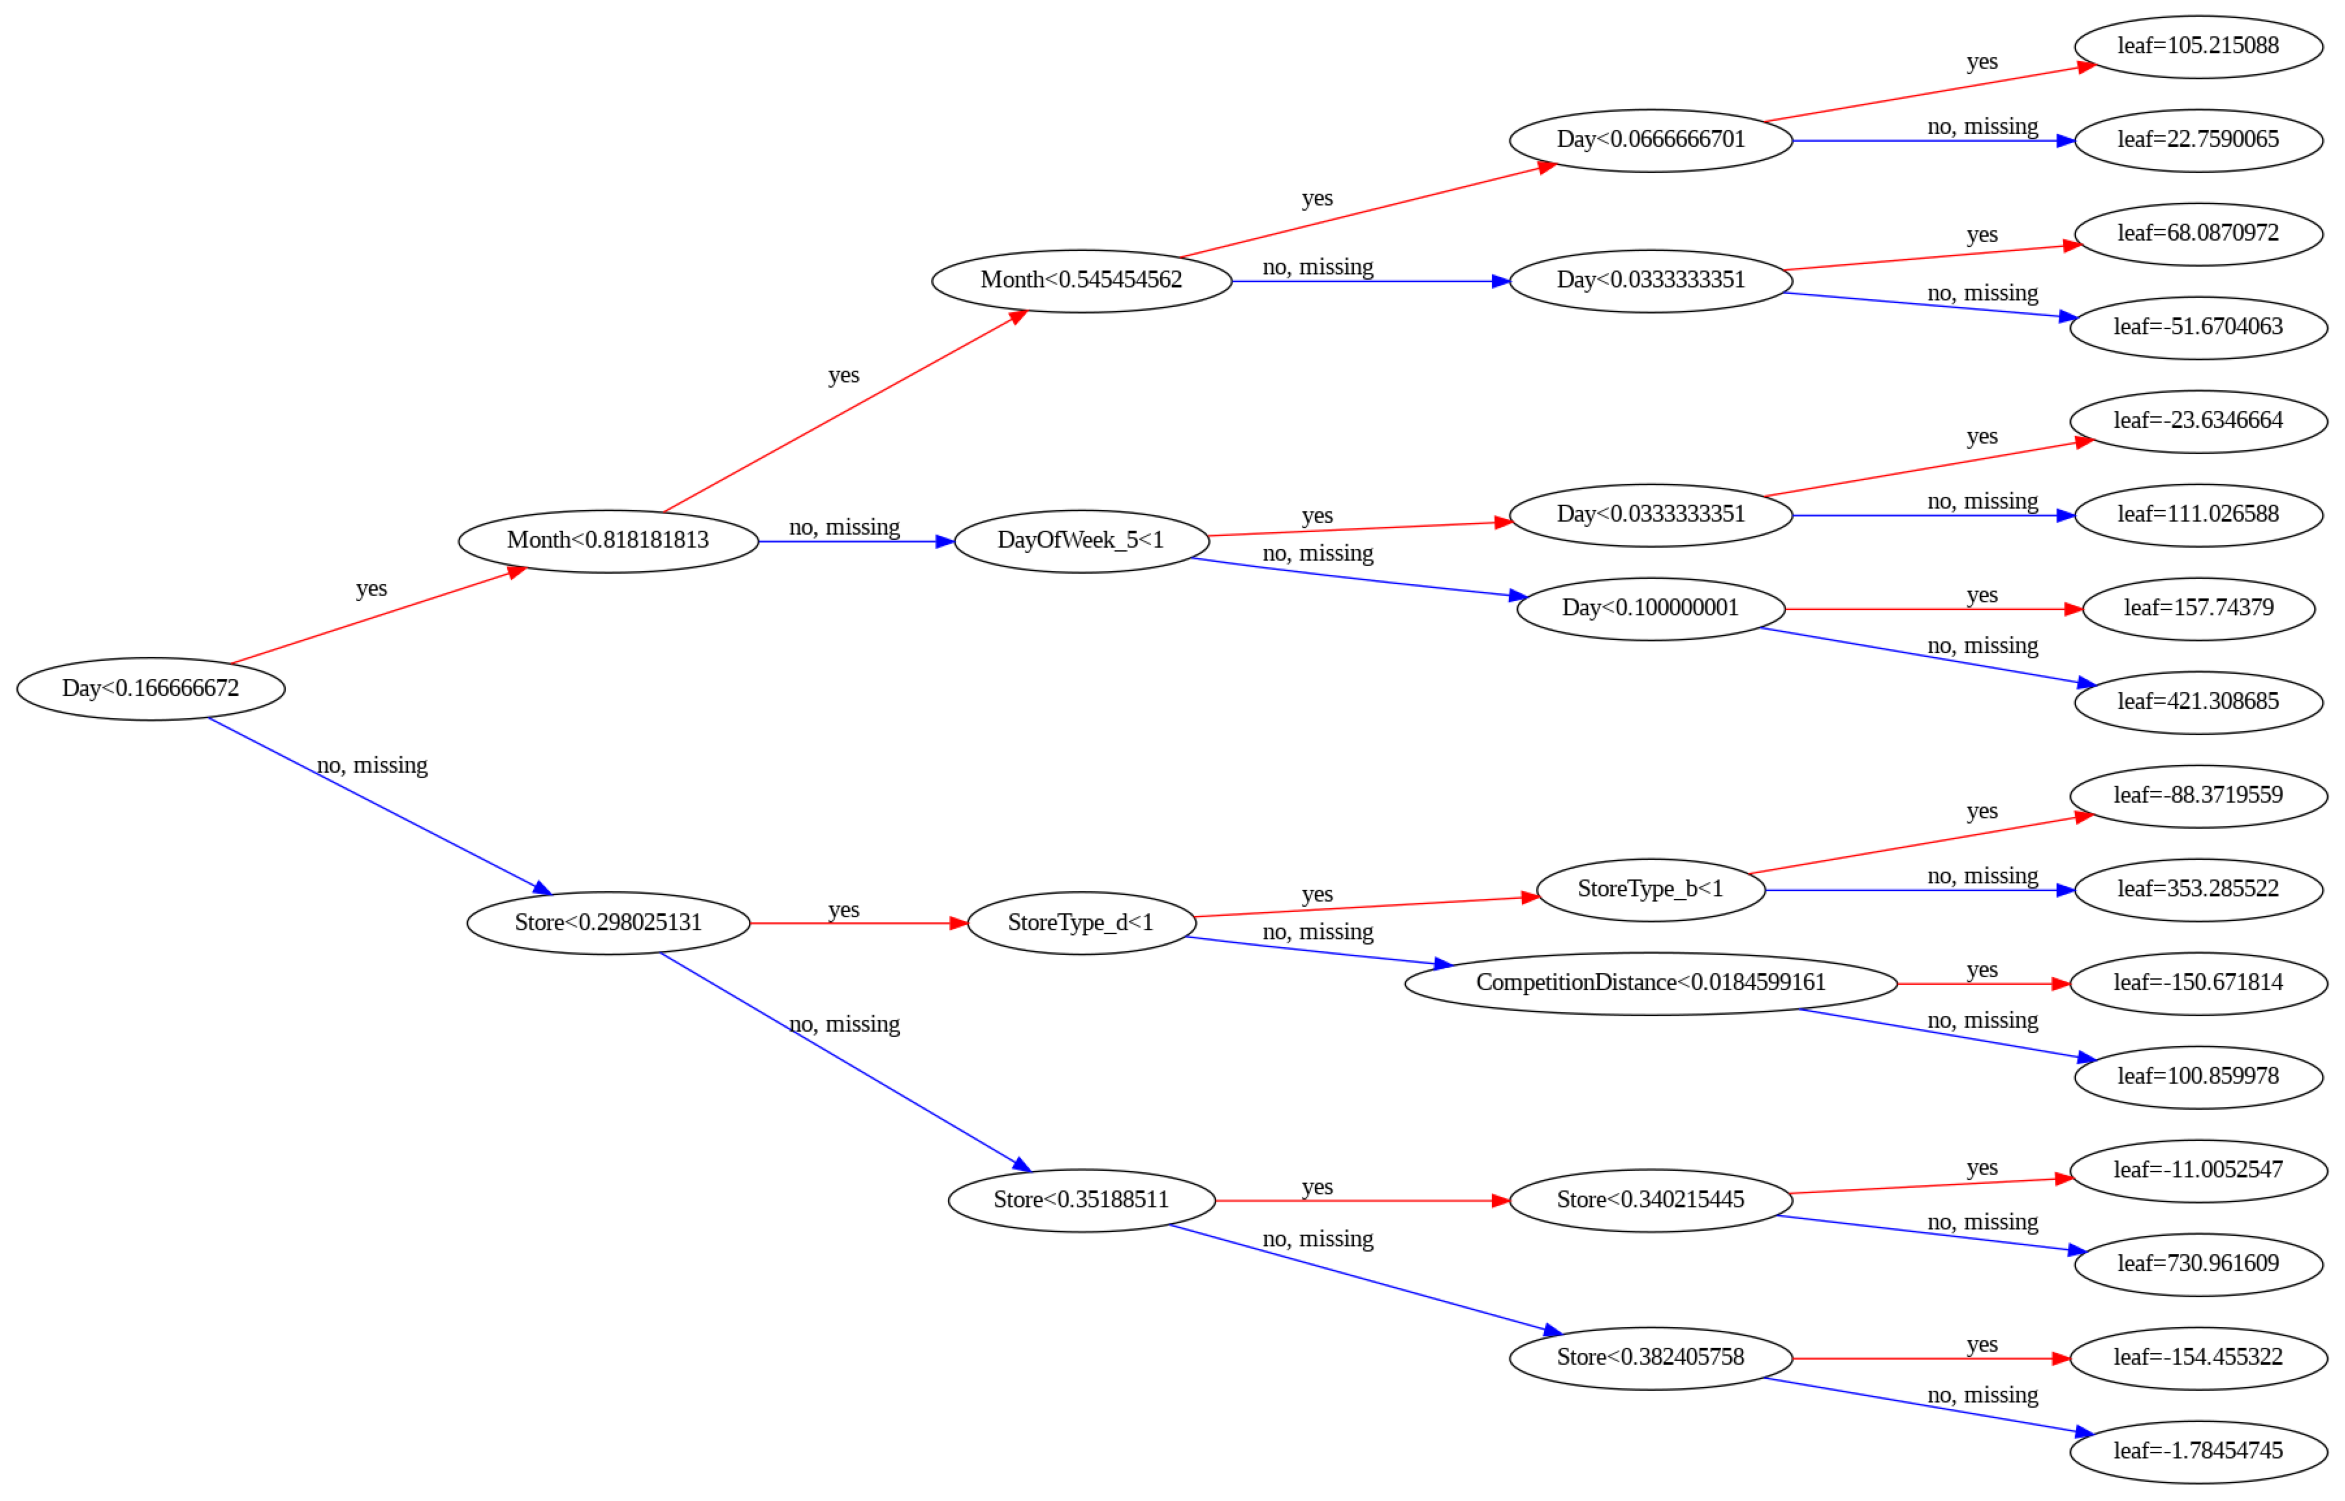

In [ ]:
plot_tree(model,rankdir='LR', num_trees=19);

Notice how the trees only compute residuals,and not the actual target value.We can also visualize the trees as text.

In [ ]:
trees = model.get_booster().get_dump()

In [12]:
len(trees)

NameError: name 'trees' is not defined

In [ ]:
print(trees[0])

0:[Promo<1] yes=1,no=2,missing=2
	1:[StoreType_b<1] yes=3,no=4,missing=4
		3:[Assortment_a<1] yes=7,no=8,missing=8
			7:[CompetitionDistance<0.00448312238] yes=15,no=16,missing=16
				15:leaf=223.091629
				16:leaf=-263.189026
			8:[WeekOfYear<0.921568632] yes=17,no=18,missing=18
				17:leaf=-467.055237
				18:leaf=-83.930191
		4:[CompetitionDistance<0.015822785] yes=9,no=10,missing=10
			9:[CompetitionDistance<0.0117352316] yes=19,no=20,missing=20
				19:leaf=654.354065
				20:leaf=3492.14575
			10:[DayOfWeek_7<1] yes=21,no=22,missing=22
				21:leaf=-187.357132
				22:leaf=877.194702
	2:[DayOfWeek_1<1] yes=5,no=6,missing=6
		5:[Month<1] yes=11,no=12,missing=12
			11:[StoreType_b<1] yes=23,no=24,missing=24
				23:leaf=208.808884
				24:leaf=1208.23828
			12:[Day<0.200000003] yes=25,no=26,missing=26
				25:leaf=668.335449
				26:leaf=1160.14038
		6:[Month<1] yes=13,no=14,missing=14
			13:[CompetitionDistance<0.00276898732] yes=27,no=28,missing=28
				27:leaf=1261.60889
				28:leaf=752.9

# Feature importance

Just like decision trees and random forests,XGBoost also provides a feature importance score for each column in the input.

In [ ]:
importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': model.feature_importances_

}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(15)

,feature,importance
1,Promo,0.357722
10,DayOfWeek_1,0.095030
24,StoreType_b,0.070104
4,Promo2,0.047395
3,CompetitionDistance,0.042932
7,Month,0.040834
27,Assortment_a,0.040716
29,Assortment_c,0.038391
9,WeekOfYear,0.033243
2,SchoolHoliday,0.032093


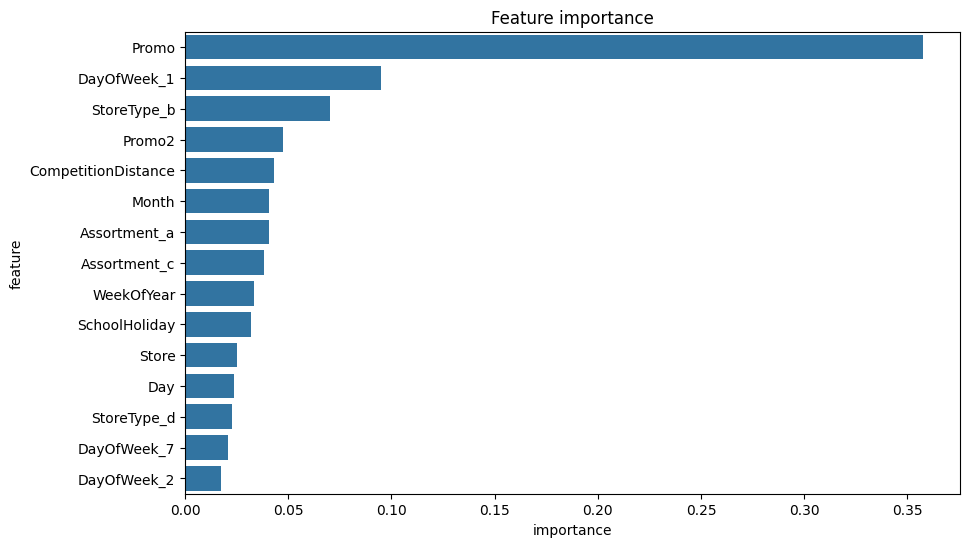

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.title('Feature importance')
sns.barplot(data=importance_df.head(15), x='importance', y='feature');

# K Fold Cross Validation
Notice that we didn't create a validation set before training our XGBoost model.we'll use a different validation strategy this time,called K-fold cross validation.

Scikit-learn provides utilities for performing K fold cross validation.

In [ ]:
from sklearn.model_selection import KFold

Let's define a helper function train_and_evaluate which trains a model with the given parameters and return the trained model,training error and validation error.

In [ ]:
def train_and_evaluate(x_train, train_targets, x_val, val_targets, **params):
  model = XGBRegressor(random_state=42, n_jobs=-1, **params)
  model.fit(x_train, train_targets)
  train_rmse = rmse(model.predict(x_train), train_targets)
  val_rmse = rmse(model.predict(x_val), val_targets)
  return model, train_rmse, val_rmse


Now we can use the KFold utility to create the different training/validations splits and train a seperate model for each fold

In [ ]:
kfold = KFold(n_splits=5, shuffle=True)

In [13]:
models = []

for train_idxs, val_idxs in kfold.split(x):
  x_train, train_targets = x.iloc[train_idxs], targets.iloc[train_idxs]
  x_val, val_targets = x.iloc[val_idxs], targets.iloc[val_idxs]
  model, train_rmse, val_rmse = train_and_evaluate( x_train,
                                                   train_targets,
                                                    x_val,
                                                    val_targets,
                                                    max_depth=4,
                                                    n_estimators=20)
  models.append(model)
  print('Train RMSE:{}, Validation RMSE:{}'.format(train_rmse, val_rmse))


NameError: name 'kfold' is not defined

Let's define a helper function to average predictions from the 5 different models.

In [ ]:
import numpy as np

In [ ]:
def predict_avg(models, inputs):
  return np.mean([model.predict(inputs) for model in models], axis=0)

In [ ]:
preds = predict_avg(models, x)

In [ ]:
preds

array([8115.7354, 7606.8726, 8195.284 , ..., 6869.1953, 7057.0874,
       9549.197 ], dtype=float32)

In [ ]:
( models[0].predict(x) + models[1].predict(x) + models[2].predict(x) ) / 3

array([8179.7153, 7677.272 , 8410.737 , ..., 7315.7305, 7114.845 ,
       9930.587 ], dtype=float32)

We can now use predict_avg to make predictions for test set.

# Hyperparameter Tuning and Regularization

Just like other machine learning models,there are several hyperparameters we can to adjust the capacity of the model and overfitting.

In [ ]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=20,
             n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
?XGBRegressor

In [ ]:
def test_params_kfold(n_splits, **params):
  train_rmse, val_rmse, models = [], [], []
  kfold = KFold(n_splits)
  for train_idxs, val_idxs in kfold.split(x):

    x_train, train_targets = x.iloc[train_idxs], targets.iloc[train_idxs]
    x_val, val_targets = x.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate( x_train,
                                                   train_targets,
                                                    x_val,
                                                    val_targets,
                                                    max_depth=4,
                                                    n_estimators=20)

    models.append(model)
    train_rmse.append(train_rmse)
    val_rmse.append(val_rmse)
    print('Train RMSE:{}, Validation RMSE:{}'.format(np.mean(train_rmse), np.mean(val_rmse)))
    return models

Since it may take a long time to perform 5-fold cross validation for each set of parameters we wish to try,we'll just pick a random 10% percent sample of the dataset as the validation set.

In [ ]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_val, train_targets, val_targets = train_test_split(x, targets, test_size=0.1)

NameError: name 'train_test_split' is not defined

In [15]:
def test_params( **params):
  model = XGBRegressor(random_state=42, n_jobs=-1, **params)
  model.fit(x_train, train_targets)
  train_rmse = rmse(model.predict(x_train), train_targets)
  val_rmse = rmse(model.predict(x_val), val_targets)
  print('Train RMSE:{}, Validation RMSE:{}'.format(train_rmse, val_rmse))


# n_estimators
The number of trees to be created.More trees = greater capacity of the model.

In [ ]:
test_params(n_estimators=10)

Train RMSE:2318.3906055710286, Validation RMSE:2305.6625945701594


In [ ]:
test_params(n_estimators=30)

Train RMSE:1878.0665589909213, Validation RMSE:1869.061596095752


In [ ]:
test_params(n_estimators=300)

Train RMSE:853.2868436229402, Validation RMSE:867.1502537046276


# max_depth
As you increase the max depth of each tree,the capacity of the tree increases and it can capture more information about the training set.

In [ ]:
test_params(max_depth=2)

Train RMSE:2388.1864458203427, Validation RMSE:2375.775452352347


In [ ]:
test_params(max_depth=5)

Train RMSE:1413.3066280888943, Validation RMSE:1407.3389339459063


In [ ]:
test_params(max_depth=10, n_estimators=10)

Train RMSE:1808.5953803988332, Validation RMSE:1825.0371229101067


# learning_rate
the scaling factor to be applied to the prediction of each tree.A very high learning rate ( close to 1 ) will lead to overfitting,and a low learning rate (close to 0 ) will lead to underfitting.

In [ ]:
test_params(n_estimators=50, learning_rate=0.1)

Train RMSE:2179.8488479708863, Validation RMSE:2170.7428452029963


In [ ]:
test_params(n_estimators=50, learning_rate=0.3)

Train RMSE:1543.564057627671, Validation RMSE:1537.1606129484323


In [ ]:
test_params(n_estimators=50, learning_rate=0.6)

NameError: name 'XGBRegressor' is not defined

In [ ]:
test_params(n_estimators=50, learning_rate=0.9)

Train RMSE:1166.9152711315419, Validation RMSE:1170.3155557369987


In [ ]:
test_params(n_estimators=50, learning_rate=0.99)

Train RMSE:1127.2356120172924, Validation RMSE:1134.051475903982


# booster
Instead of using Decision Trees, XGBoost can also train a linear model for each iteration.This can be configured using booster.

In [ ]:
test_params(booster='gblinear')

Train RMSE:2730.6648457838983, Validation RMSE:2715.3281569637215


Clearly, a linear model is not well suited for this dataset.

# Putting it Together and Making Predictions
lets train a final model on the entire training set with custom hyperparameters.

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=110,
                     learning_rate=0.2, max_depth=10, subsample=0.9,
                     colsample_bytree=0.7)
model.fit(x, targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=110,
             n_jobs=-1, num_parallel_tree=None, ...)

Now that model is trained ,we can make predictions on the test set.


In [ ]:
test_preds = model.predict(x_test)

In [ ]:
test_preds

array([ 4175.2095,  7213.213 ,  9780.822 , ...,  7746.5176, 23680.564 ,
        7348.316 ], dtype=float32)

Let's add the predictions into submission_df.

In [ ]:
submission_df['Sales'] = test_preds

Recall,however,if the store is not open,then sales must be 0.Thus whwreever the value of open in the test set is 0,we can set the sales to 0.Also there some missing value for open in the test set.We'll replace them with 1 ( open ).

In [ ]:
test_df.Open.isna().sum()

np.int64(11)

In [ ]:
submission_df

,Id,Sales
0,1,4175.209473
1,2,7213.212891
2,3,9780.822266
3,4,6550.338867
4,5,6968.417969
...,...,...
41083,41084,2653.789307
41084,41085,8041.229004
41085,41086,7746.517578
41086,41087,23680.564453


In [ ]:
submission_df['Sales'] = submission_df['Sales'] *test_df.Open.fillna(1.)

In [ ]:
submission_df

,Id,Sales
0,1,4175.209473
1,2,7213.212891
2,3,9780.822266
3,4,6550.338867
4,5,6968.417969
...,...,...
41083,41084,2653.789307
41084,41085,8041.229004
41085,41086,7746.517578
41086,41087,23680.564453


In [ ]:
submission_df.sample(20)

,Id,Sales
18907,18908,7207.184082
27177,27178,9039.281250
1452,1453,6252.122070
3663,3664,0.000000
34124,34125,0.000000
10889,10890,4050.973145
32432,32433,4401.950195
4494,4495,5665.129395
13000,13001,3933.149170
22927,22928,6537.395996


We can now save the predictions as a CSV file

In [ ]:
submission_df.to_csv('submission.csv',index=None)